<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Problemes 8 - Programació Dinàmica</h2>
</center>
</div>

In [33]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [34]:
import networkx as nx
from matplotlib import pyplot as plt
from digraph_plot import my_draw_networkx_edge_labels
import numpy as np

<div class="alert alert-success">
    <h1>Problema 1: Problema de la motxilla</h1>
    <p>
        Implementeu la funció <b>knapsack</b>. Donat un nombre enter positiu, $W$, que defineix la capacitat (en Kg) màxima de la motxilla, una llista d'enters, $weights$, que definex el pes dels objectes i una llista d'enters, $values$, que indica el valor dels objectes, retorneu el valor màxim que podem ficar dins la motxilla. <br>
    <p>
    <p><b>Quina és la complexitat de l'algorisme?</b></p>
    
</div>

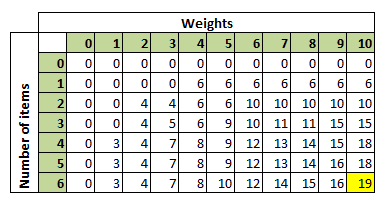<p>
    Exemple:
    <ul>
        <li>Número d'items: 6
        <li>Preus dels ítems: 6, 4, 5, 3, 9, 7
        <li>Pesos dels ítems: 4, 2, 3, 1, 6, 4
        <li>Capacitat de la motxilla: 10
    <center><img src='img/knapsack.png'></center>
</p>

In [ ]:
def knapsack(W, weights, values, n):
    """
    Implementa la solució al problema de la motxilla.

    Params
    ======
    :W: Capacitat màxima de la motxilla
    :weights : llista d'enters amb els pesos dels objectes
    :values : llista d'enters amb els valors dels objectes
    :n: numero d'objectes
    
    Returns
    =======
    :value: valor màxim que podem ficar dins la motxilla
    """
    
    # Inicialitzem la taula de programació dinàmica.
    # Cada cel·la (i,w) ens retornarà el valor màxim que podem obtenir considerant els 'i' primers objectes
    # tals que el seu pes total és inferior o igual a w.
    K = [[0 for x in range(W+1)] for x in range (n+1)]
    
    # EL TEU CODI AQUÍ
    
    # Hago este arreglo para no preocuparme de los índices.
    c_weights = [0] + weights[:]
    c_values = [0] + values[:]

    for i in range(1, len(c_weights)): # Ignoraremos la primera fila.
        for j in range(W+1):

            if c_weights[i] > j: # Si el peso de añadir el objeto i supera la capacidad...
                K[i][j] = K[i-1][j] # tomamos el valor máximo de tener i-1 objetos.

            else:   # En el caso de que sí quepa...
                    # el valor máximo será el máximo entre no añadir el objeto i (es decir, el valor máximo de todos los anteriores)
                    # y tomar el máximo para la mochila de peso j-peso i y sumarle el objeto i.
                K[i][j] = max(K[i-1][j], K[i-1][j-c_weights[i]] + c_values[i]) 


    # Print
    for line in K:
        for elm in line:
            print(f"{elm:>3}",end=" ")
        print()
    # end print
    
    return K[n][W]

In [36]:
W = 4
values = [6, 10, 12]
weights = [1, 2, 3]
n = len(values)
print(knapsack(W, weights, values, n))  # Retorna 18

  0   0   0   0   0 
  0   6   6   6   6 
  0   6  10  16  16 
  0   6  10  16  18 
18


In [37]:
W = 10
values = [6,4,5,3,9,7]
weights = [4,2,3,1,6,4]
n = len(values)
print(knapsack(W, weights, values, n))  # Retorna 19

  0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   6   6   6   6   6   6   6 
  0   0   4   4   6   6  10  10  10  10  10 
  0   0   4   5   6   9  10  11  11  15  15 
  0   3   4   7   8   9  12  13  14  15  18 
  0   3   4   7   8   9  12  13  14  16  18 
  0   3   4   7   8  10  12  14  15  16  19 
19


In [38]:
W = 40
values = [60, 100, 120]
weights = [10, 20, 30]
n = len(values)
print(knapsack(W, weights, values, n))  # Retorna 180

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60 
  0   0   0   0   0   0   0   0   0   0  60  60  60  60  60  60  60  60  60  60 100 100 100 100 100 100 100 100 100 100 160 160 160 160 160 160 160 160 160 160 160 
  0   0   0   0   0   0   0   0   0   0  60  60  60  60  60  60  60  60  60  60 100 100 100 100 100 100 100 100 100 100 160 160 160 160 160 160 160 160 160 160 180 
180


<div class="alert alert-success">
    <h1>Problema 2: Travelling Salesman Problem</h1>
    <p>
        Implementeu la funció <b>travelling_salesman</b>. Seguiu una estratègia de programació dinàmica on aneu emmagatzemant càlculs realitzats prèviament.<br><br> 
        <b>Quina és la complexitat de l'algorisme?</b>
    <p>
        
        
    
</div>

In [39]:
from itertools import combinations
from collections import defaultdict

def travelling_salesman(G):
    """
    Aquesta funció implementa la solució al TSP (Travelling Salesman Problem)
    
    Params
    ======
    :G: Un objecte de la classe nx.DiGraph
    
    Returns
    =======
    :value: El cost mínim de visitar tots els nodes
    """
    
    value = 0
    return value

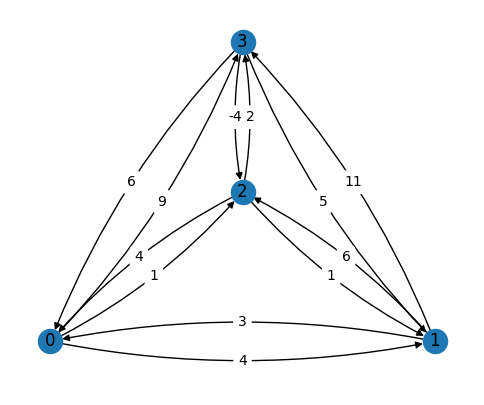

0

In [40]:
# Matriu de pesos del graf que volem crear
A = np.array([[0,4,1,9],
              [3,0,6,11],
              [4,1,0,2],
              [6,5,-4,0]])
#A = np.array([[0,3,4,6],[4,0,1,5],[1,6,0,-4],[9,11,2,0]])
#A = np.array([[0,10,15,20],[10,0,35,25],[15,35,0,30],[20,25,30,0]])
G = nx.from_numpy_array(A,create_using=nx.DiGraph)

fig = plt.figure(figsize=(6,5))

# Si voleu executar grafs amb més de 4 nodes, podeu canviar el layout a spring_layout
pos=nx.planar_layout(G) 
nx.draw(G, pos,with_labels=True,connectionstyle='arc3, rad = 0.1', ax=fig.gca())
labels = nx.get_edge_attributes(G,'weight')
my_draw_networkx_edge_labels(G,pos,edge_labels=labels, rad=0.1,rotate=False)
plt.show()

res = travelling_salesman(G)
res   # Retorna 9

<div class="alert alert-success">
    <h1>Problema 3: Train Sorting</h1>
    <p>
        Implementeu la funció <b>train_sorting</b>. Seguiu una estratègia de programació dinàmica .
    <p>  
     <p>L'Èric és enginyer. Condueix trens però també organitza els vagons dins cada tren. Prefereix posar els vagons en ordre decreixent de pes, amb el vagó més pesat al davant del tren.
     Malauradament, classificar els vagons de tren no és fàcil. Els vagons arriben a l'estació de tren en un ordre predeterminat i no es pot simplement agafar un vagó i col·locar-lo en un lloc qualsevol.
     Quan arriba un vagó, l'Èric pot afegir-lo al principi o al final del seu tren, o negar-se a afegir-lo. El tren resultant ha de ser el més llarg possible, però els vagons que conté han d'estar ordenats per pes.</p>
     <p>Tenint en compte els pesos dels vagons en l'ordre en què arriben, quin és el tren més llarg que pot fer l'Èric?</p>
</div>

In [41]:
def train_sorting(values):
    """
    Calcula la longitd màxima que pot tenir el tren
    
    Params
    ======
    :values: Vector d'enters que indica el pes del vagons en l'ordre en que arriben a l'estació
    
    Returns
    =======
    :d: La longitud màxima del tren
    """
    pass

In [42]:
values = [1,2,3,2,5,3]
print(train_sorting(values))  # Retorna 4

None


 <div class="alert alert-success">
     <h1>Problema 4: Longest Palindromic Subsequence</h1>  
     <p>Donada una seqüencia de text, volem trobar la longitud del palindom més llarg. Un palíndrom és una paraula que es llegeix igual d'esquerra a dreta que de dreta a esquerra.<br><br>
     Exemple: BBABCBCAB <br>
     Solució: longitud 7 ( BABCBAB )<br><br>
    </p>
    <p>Trobeu una solució bottom-up amb programació dinàmica</p>
    <p><b>Pista:</b> si el primer i l'últim caràcter de la cadena és el mateix : $lps(str) = 2 + lps(str[1:n-2])$</p>
    <p>en cas contrari: $lps(str) = max(lps(str[0:n-2],str[1:n-1])$</p>
 </div>

In [43]:
# Aquí teniu la solució per força bruta
def longest_palindrom_subsequence_brute_force(seq, i,j):
    """
    Algorisme de força bruta (recursiu) 
    
    Params
    ======
    :seq: Una cadena de text
    :prices: Una llista amb els preus de cada longitud de segment.
    
    Returns
    =======
    :d: La longitud del palindrom més llarg
    """
    # cas base 1, sequencia d'un únic caràcter
    if i == j:
        return 1
    
    # cas base 2, sequencia de dos caràcters
    if (seq[i] == seq[j]) and (i + 1 == j):
        return 2
    
    # Si els dos elements són iguals
    if (seq[i] == seq[j]):
        return longest_palindrom_subsequence_brute_force(seq, i + 1, j - 1) + 2
    
    # Si són diferents
    return max(longest_palindrom_subsequence_brute_force(seq, i, j - 1),
               longest_palindrom_subsequence_brute_force(seq, i + 1, j))


In [44]:
seq = 'BBABCBCAB'
print(longest_palindrom_subsequence_brute_force(seq,0,len(seq)-1))

7


In [45]:
def longest_palindrom_subsequence_dp(seq):
    """
    Algorisme usant una estratègia bottom-up
    
    Params
    ======
    :text: El text que estem considerant
    
    Returns
    =======
    :d: La longitud del palindrom més llarg
    """
    pass


In [46]:
seq = 'BBABCBCAB'
print(longest_palindrom_subsequence_dp(seq))

None
